# Mini projects

## Level 1

### Photo art app

1. Create a function that receives an image and converts it to a sketch so it looks similar to this:
![Example 1](img/sketch.png)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline

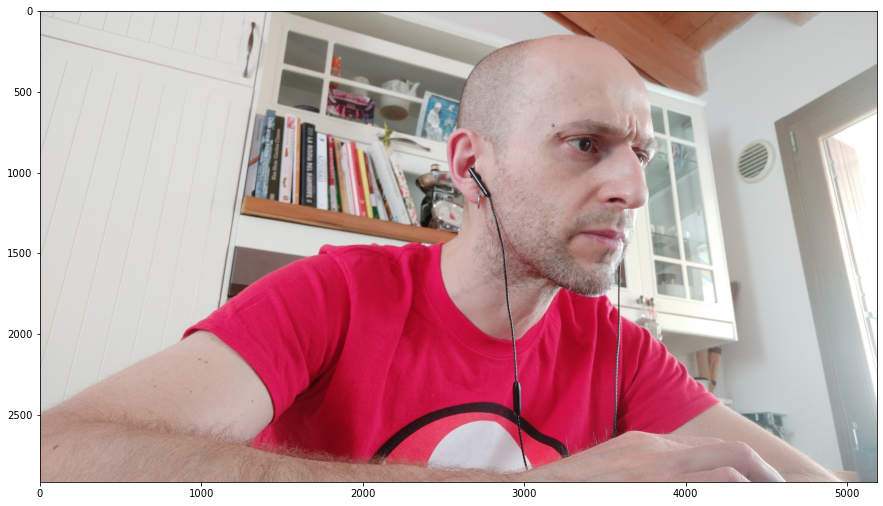

In [2]:
orig = cv2.imread('./img/me.jpg')

plt.figure(figsize = (15, 10))
plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB));

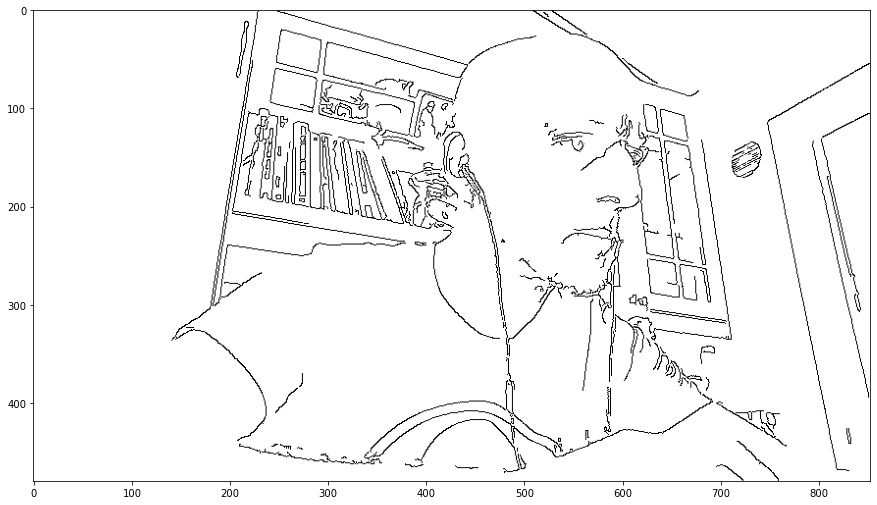

In [3]:
me = orig.copy()

def sketchify(img, height_final):
    reduct = height_final / img.shape[0]
    kernel = 5
    # resize the kernel in GaussianBlur as needed

    if kernel * img.shape[1] // 480 % 2 == 1:
        kernel_dim = kernel * img.shape[1] // 480
    else:
        kernel_dim = kernel * img.shape[1] // 480 + 1

    img = cv2.resize(img, None, fx=reduct, fy=reduct)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img = cv2.GaussianBlur(img, (kernel_dim, kernel_dim), 0.7)
    img = cv2.Canny(img, 100, 200)

    _, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

    return cv2.bitwise_not(img)



me = sketchify(me, 480)

plt.figure(figsize = (15, 10))
plt.imshow(me, cmap='gray');

In [17]:
video = cv2.VideoCapture(0)

while(video.isOpened()):
    check, frame = video.read()
    if frame is not None:
        img = sketchify(frame, 480)
        #img = frame
        cv2.imshow('frame',img)        
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break
    else:
        break


video.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### Instagram filters app

1. Create a function that given a photo it applies a black and white filter
1. Create a filter that will change color of the image 

## Level 2

### Photo art app

1. Change the app so it can now do the same but using your webcam to make it in real time  
**Hint:** you can use ```cv2.VideoCapture(0)```

### Photo correction app

1. Create a funtion to clean *noise* from images
![Noisy image](img/n.png)

### Instagram filters app

1. Create a function that applies a sepia filter to the image, for a BGR image apply this kernel:
        [0.272, 0.534, 0.131],
        [0.349, 0.686, 0.168],
        [0.393, 0.769, 0.189]
        
Get the BGR value of the pixel.
Calculate tr, tg and tb using the formula

tb = 0.272R + 0.534G + 0.131B
tg = 0.349R + 0.686G + 0.168B
tr = 0.393R + 0.769G + 0.189B

Take the integer value.

Set the new RGB value of the pixel as per the following condition:

If tb > 255 then b = 255 else b = tb
If tg > 255 then g = 255 else g = tg
If tr > 255 then r = 255 else r = tr


Example:

Consider a color pixel with the following values

A = 255

R = 100

G = 150

B = 200

Where A, R, G and B represents the Alpha, Red, Green and Blue value of the pixel.

Remember! ARGB will have an integer value in the range 0 to 255.

So, to convert the color pixel into sepia pixel we have to first calculate tr, tg and tb.

tr = 0.393(100) + 0.769(150) + 0.189(200)

tr = 192.45

tr = 192 (taking integer value)

Similarly,

tg = 0.349(100) + 0.686(150) + 0.168(200) = 171 (taking integer value)

and tb = 0.272(100) + 0.534(150) + 0.131(200) = 133 (taking integer value)

## Level 3

### Instagram filters app

1. Apply the sepia filter by using the cv2.transfor function
1. Create different filters from the sepia filter so it renders different images

# More projects

## Handwriting recognition

1. Write a one digit number (from 0 to 9) on a paper and using your mobile phone take a picture of it
1. Crop the image manually and pass it to a a function that will process it so it looks like a char in the MNIST dataset, make sure it is the correct size as well
![4](img/4.png)

In [ ]:
!ls img

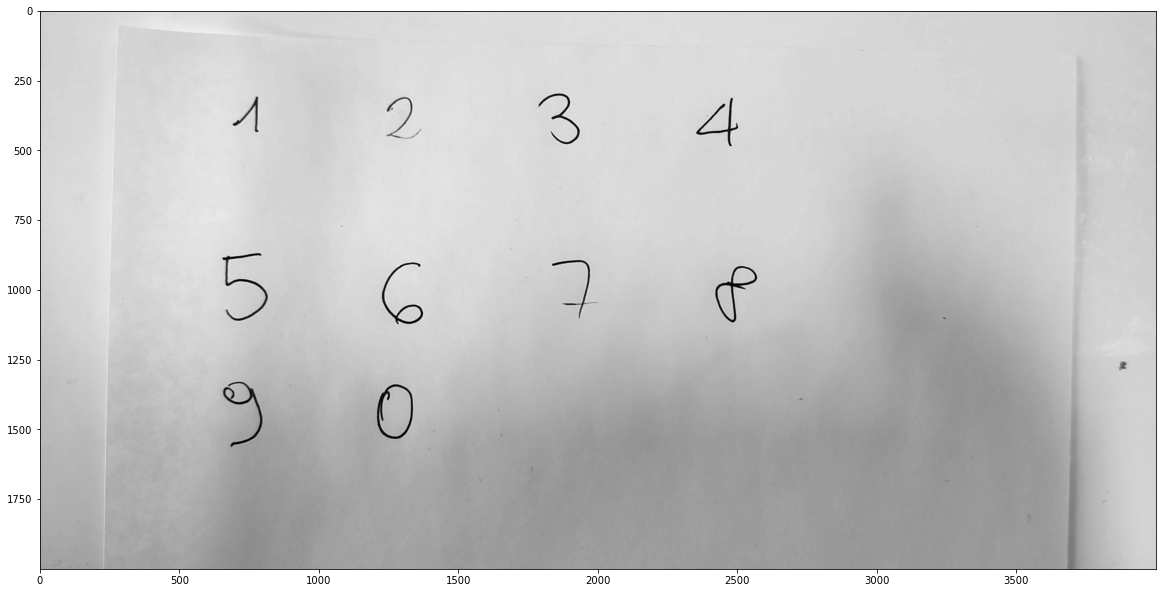

In [4]:
digits = cv2.imread('./img/DIGITS.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize = (20,15))
plt.imshow(digits);

In [5]:
def to_mnist(img):
    _, img = cv2.threshold(img, 150, 255, cv2.THRESH_TRUNC)
    img = cv2.bitwise_not(img)
    
    kernel = np.ones((11, 11), np.uint8)
    # img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iteraions=1)
    img = cv2.dilate(img, kernel, iterations=1)
    _, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
    # kernel_er = np.ones((7, 7), np.uint8)
    # img = cv2.erode(img, kernel_er, iterations=1)
    img = cv2.medianBlur(img, 7)

    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_LANCZOS4)
    
    return img

In [6]:
def crop(img: np.ndarray, start: tuple, dim: tuple):
    return img[start[0]:start[0]+dim[0], start[1]:start[1]+dim[1]]


In [7]:
def show_digits(img1, img2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.imshow(img1);
    ax2.imshow(img2);

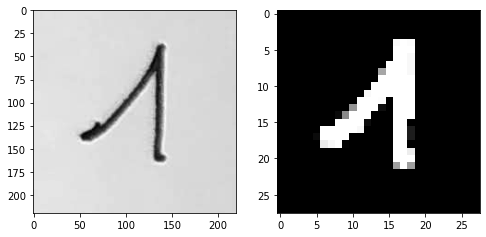

In [82]:
one = crop(digits, (270, 640), (220, 220))
one_mnist = to_mnist(one)

show_digits(one, one_mnist)

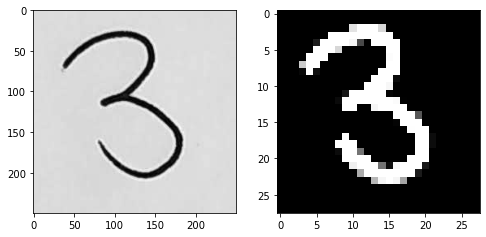

In [83]:
three = crop(digits, (270, 1750), (250, 250))
three_mnist = to_mnist(three)

show_digits(three, three_mnist)

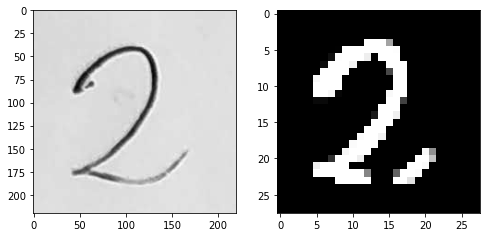

In [84]:
two = crop(digits, (270, 1200), (220, 220))
two_mnist = to_mnist(two)

show_digits(two, two_mnist)

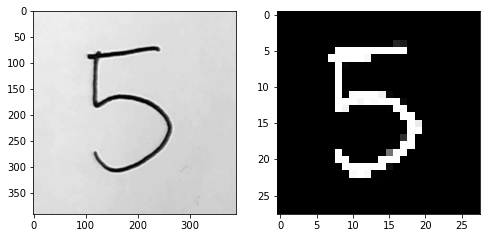

In [85]:
five = crop(digits, (800, 550), (390, 390))
five_mnist = to_mnist(five)

show_digits(five, five_mnist)


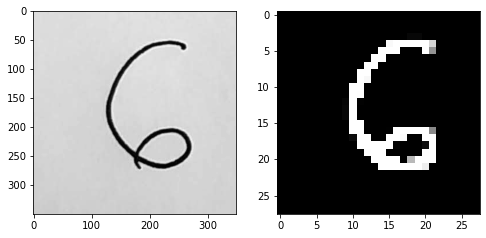

In [86]:
six = crop(digits, (850, 1100), (350, 350))
six_mnist = to_mnist(six)

show_digits(six, six_mnist)

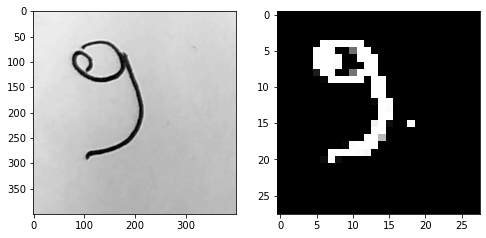

In [87]:
nine = crop(digits, (1270, 580), (400, 400))
nine_mnist = to_mnist(nine)

show_digits(nine, nine_mnist)

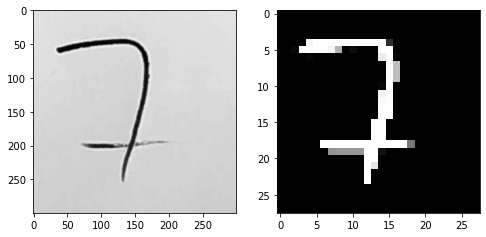

In [88]:
seven = crop(digits, (850, 1800), (300, 300))
seven_mnist = to_mnist(seven)

show_digits(seven, seven_mnist)

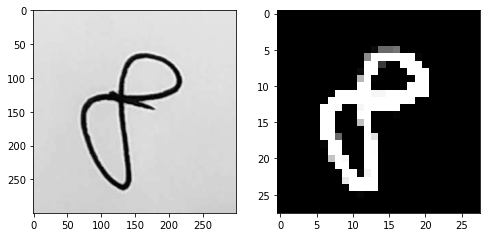

In [89]:
eight = crop(digits, (850, 2350), (300, 300))
eight_mnist = to_mnist(eight)

show_digits(eight, eight_mnist)

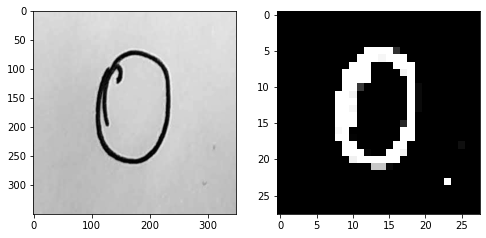

In [90]:
zero = crop(digits, (1270, 1100), (350, 350))
zero_mnist = to_mnist(zero)

show_digits(zero, zero_mnist)

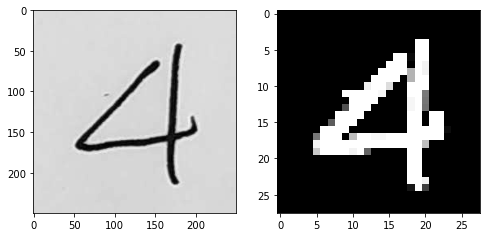

In [91]:
four = crop(digits, (270, 2300), (250, 250))
four_mnist = to_mnist(four)

show_digits(four, four_mnist)

1. Pass it through a MNIST classifier and print the prediction on screen

In [92]:
def view_classify(img, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

In [93]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

from model import Net
from torchvision import datasets, transforms

In [94]:
class Exercise_net(nn.Module):
    
    # Defining the layers, 128, 64, 10 units each
    def __init__(self):
        super().__init__()
        # input layer
        self.fc1 = nn.Linear(784, 16)
        # first hidden layer, size = 16
        self.fc2 = nn.Linear(16, 32)
        #  # second hidden layer, size = 32
        self.fc3 = nn.Linear(32, 8)
        # third hidden layer, size = 8
        self.fc4 = nn.Linear(8, 10)
        
    # Forward pass through the network, returns the output logits
    def forward(self, x):

        #  input layer
        x = self.fc1(x)
        x = F.relu(x)
        # first hidden layer and activation
        x = self.fc2(x)
        x = F.relu(x)
        # second hidden layer and activation
        x = self.fc3(x)
        x = F.relu(x)
        # third hidden layer and output layer
        x = self.fc4(x)
        x = F.log_softmax(x, dim=1)
        return x

model = Exercise_net()

In [95]:
model = torch.load('./cnn.pth')

model

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Dropout(p=0.4, inplace=True)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU(inplace=True)
    (4): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): Dropout(p=0.4, inplace=True)
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU(inplace=True)
    (8): Conv2d(64, 32, kernel_size=(3, 3), stride=(2, 2))
    (9): Dropout(p=0.4, inplace=True)
    (10): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=4608, out_features=64, bias=True)
    (1): Dropout(p=0.4, inplace=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): Dropout(p=0.4, inplace=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=16, bia

In [96]:
def to_tensor(arr: np.ndarray):
    tens = torch.from_numpy(arr).float()
    tens = F.normalize(tens)
    # tens = (tens - 0.5)/0.5
    tens = tens.reshape(1, 1 ,28, 28)
    return tens

In [97]:
three_mnist = to_tensor(three_mnist)
one_mnist = to_tensor(one_mnist)
two_mnist = to_tensor(two_mnist)
five_mnist = to_tensor(five_mnist)
six_mnist = to_tensor(six_mnist)
nine_mnist = to_tensor(nine_mnist)
seven_mnist = to_tensor(seven_mnist)
eight_mnist = to_tensor(eight_mnist)
zero_mnist = to_tensor(zero_mnist)
four_mnist = to_tensor(four_mnist)

In [115]:
with torch.no_grad():
    model = model.cuda()
    three_mnist = three_mnist.cuda()

    ps = model(three_mnist)
    pred = torch.exp(ps)

In [116]:
pred

tensor([[0.0056, 0.0334, 0.0864, 0.2538, 0.0131, 0.3352, 0.0093, 0.0107, 0.2317,
         0.0208]], device='cuda:0')

In [117]:
torch.argmax(pred).item()

5

In [80]:

view_classify(one_mnist.view(1, 28, 28), pred)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

1. Modify the image so now it also contains the predicted result on the image
1. Try it with all digits